#### 1. Import the Required libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

### Load the datasets
main_df = pd.read_csv("spam.csv",encoding = "Windows-1252")

In [2]:
main_df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
main_df.shape

(5572, 5)

#### 2. Data Cleaning

In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
#### Remove unnecessary columns
main_df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [6]:
### Change the name of columns
main_df.rename(columns = {'v1':'output','v2':'text'}, inplace = True)

In [9]:
### Convert the text of output to the 0 and 1 using Label Encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
main_df['output'] = encoder.fit_transform(main_df['output'])

In [11]:
main_df

,output,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
### Check for null values
main_df.isnull().sum()

output    0
text      0
dtype: int64

In [22]:
#### Check for duplicate values
main_df.duplicated().sum()

np.int64(403)

In [26]:
### Remove duplicated values
main_df = main_df.drop_duplicates(keep = "first")

In [27]:
main_df.duplicated().sum()

np.int64(0)

In [28]:
main_df.shape

(5169, 2)

#### 3. Exploratory Data Analysis

In [29]:
### Check the data distribution of spam and ham
main_df['output'].value_counts()

output
0    4516
1     653
Name: count, dtype: int64

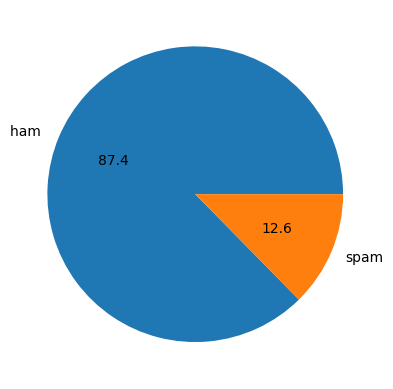

In [37]:
### Check the quantity of spam and not spam
plt.pie(main_df['output'].value_counts(),labels = ['ham ','spam'],autopct ="%0.1f")
plt.show()

##### By above result we know that data is not balanced

In [39]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

###### Now for better Analysis check the number of words, numbers and sentences

In [44]:
main_df['num_characters'] = main_df['text'].apply(len)

C:\Users\User\AppData\Local\Temp\ipykernel_20640\76827650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['num_characters'] = main_df['text'].apply(len)


In [45]:
main_df

,output,text,text_length,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111,111
1,0,Ok lar... Joking wif u oni...,29,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,155
3,0,U dun say so early hor... U c already then say...,49,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61,61
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,161
5568,0,Will Ì_ b going to esplanade fr home?,37,37
5569,0,"Pity, * was in mood for that. So...any other s...",57,57
5570,0,The guy did some bitching but I acted like i'd...,125,125


In [ ]:
main_df['output'].appl